Analyzing 34 stocks for August 2025
Period: 2025-08-01 to 2025-08-20
Successfully downloaded data for 34 stocks

S&P 500 was down on 6 days in August 2025:

Date         Market Change
------------------------------
2025-08-01   -0.78%
2025-08-05   -0.59%
2025-08-07   -0.54%
2025-08-11   -0.25%
2025-08-15   -0.43%
2025-08-19   -0.54%

Found 67 instances of stocks outperforming on down days

Top 10 Outperformances:
      Date Ticker   Open  Close  Stock_Change_pct  Market_Change_pct  Outperformance_pct
2025-08-05    UNH 241.16 251.00              4.08              -0.59                4.67
2025-08-01   KLAC 854.34 884.71              3.56              -0.78                4.34
2025-08-15   MRNA  26.97  28.02              3.89              -0.43                4.32
2025-08-07    AMD 166.84 172.40              3.33              -0.54                3.87
2025-08-07   DELL 130.17 133.93              2.89              -0.54                3.43
2025-08-01   GNRC 189.35 193.63              2.26

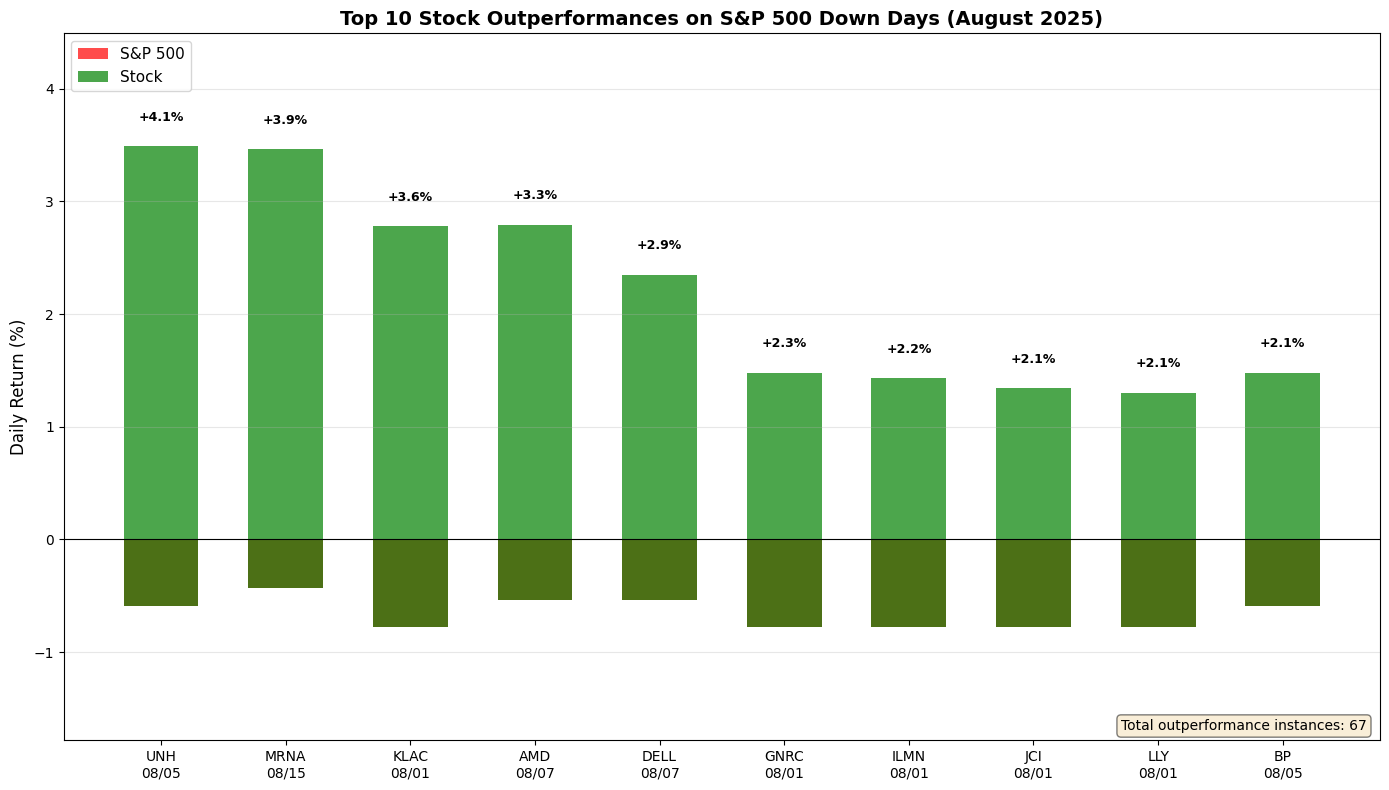


Results exported to:
  - august_outperformers.csv (detailed daily data)
  - august_summary_stats.csv (summary by stock)

FINAL SUMMARY:
  Total S&P 500 down days: 6
  Total outperformance instances: 67
  Unique stocks that outperformed: 31
  Average outperformance: 1.49%
  Best single-day outperformance: 4.67%

NVDA Performance Analysis on S&P 500 Down Days

      Date    Open   Close Stock_pct Market_pct Outperformed
2025-08-01 $174.09 $173.72    -0.21%     -0.78%           No
2025-08-05 $179.62 $178.26    -0.76%     -0.59%           No
2025-08-07 $181.57 $180.77    -0.44%     -0.54%           No
2025-08-11 $182.05 $182.06     0.01%     -0.25%          Yes
2025-08-15 $181.88 $180.45    -0.79%     -0.43%           No
2025-08-19 $182.43 $175.64    -3.72%     -0.54%           No

Summary Statistics:
  Days analyzed: 6
  Days outperformed: 1
  Outperformance rate: 16.7%

META Performance Analysis on S&P 500 Down Days

      Date    Open   Close Stock_pct Market_pct Outperformed
2025-08-0

In [9]:
# Cell 1: Import Required Libraries
import yfinance as yf
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Cell 2: Define Stock Tickers and Time Period
# List of stock tickers to analyze
tickers = [
    'META', 'REGN', 'FI', 'NICE', 'GILD', 'KLAC', 'MITK', 'SNPS', 'RMBS', 'FIS',
    'AMAT', 'WFC', 'AMD', 'LLY', 'DELL', 'BP', 'JCI', 'UNH', 'NVO', 'NOK',
    'GOOG', 'COUR', 'IDCC', 'GRAL', 'ILMN', 'TXN', 'UIS', 'MRNA', 'GNRC', 'EL',
    'ROK', 'CRWD', 'NOW', 'NVDA'
]

# Define August 2025 period (up to today)
start_date = '2025-08-01'
end_date = '2025-08-20'

print(f"Analyzing {len(tickers)} stocks for August 2025")
print(f"Period: {start_date} to {end_date}")

# Cell 3: Download Market and Stock Data
# Download S&P 500 data
market = yf.download('^GSPC', start=start_date, end=end_date, progress=False)

# Flatten multi-level columns if they exist
if isinstance(market.columns, pd.MultiIndex):
    market.columns = market.columns.get_level_values(0)

market['Daily_Return'] = ((market['Close'] - market['Open']) / market['Open']) * 100

# Download all stock data
stock_data = {}
for ticker in tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        if not data.empty:
            # Flatten multi-level columns if they exist
            if isinstance(data.columns, pd.MultiIndex):
                data.columns = data.columns.get_level_values(0)
            data['Daily_Return'] = ((data['Close'] - data['Open']) / data['Open']) * 100
            stock_data[ticker] = data
    except Exception as e:
        pass

print(f"Successfully downloaded data for {len(stock_data)} stocks")

# Cell 4: Identify S&P 500 Down Days
# Find days when S&P 500 was down
market_down_days = market[market['Daily_Return'] < 0].copy()

print(f"\nS&P 500 was down on {len(market_down_days)} days in August 2025:")
print("\nDate         Market Change")
print("-" * 30)
for date in market_down_days.index:
    daily_return = market_down_days.loc[date, 'Daily_Return']
    # Handle both single value and Series
    if isinstance(daily_return, pd.Series):
        daily_return = daily_return.iloc[0]
    print(f"{date.strftime('%Y-%m-%d')}   {daily_return:.2f}%")

# Cell 5: Core Analysis Function
def find_outperformers(stock_data, market_down_days):
    """
    Find stocks that went up on days when the market was down.

    Returns:
        DataFrame with outperforming stocks and their performance metrics
    """
    outperformers = []

    for ticker, data in stock_data.items():
        for date in market_down_days.index:
            if date in data.index:
                stock_return = data.loc[date, 'Daily_Return']
                market_return = market_down_days.loc[date, 'Daily_Return']

                # Handle Series objects
                if isinstance(stock_return, pd.Series):
                    stock_return = stock_return.iloc[0]
                if isinstance(market_return, pd.Series):
                    market_return = market_return.iloc[0]

                # Check if stock went up when market was down
                if stock_return > 0:
                    stock_open = data.loc[date, 'Open']
                    stock_close = data.loc[date, 'Close']

                    # Handle Series objects
                    if isinstance(stock_open, pd.Series):
                        stock_open = stock_open.iloc[0]
                    if isinstance(stock_close, pd.Series):
                        stock_close = stock_close.iloc[0]

                    outperformers.append({
                        'Date': date,
                        'Ticker': ticker,
                        'Open': round(stock_open, 2),
                        'Close': round(stock_close, 2),
                        'Stock_Change_pct': round(stock_return, 2),
                        'Market_Change_pct': round(market_return, 2),
                        'Outperformance_pct': round(stock_return - market_return, 2)
                    })

    # Create DataFrame and sort by outperformance
    df = pd.DataFrame(outperformers)
    if not df.empty:
        df = df.sort_values(['Date', 'Outperformance_pct'], ascending=[True, False])

    return df

# Run the analysis
outperformers_df = find_outperformers(stock_data, market_down_days)

print(f"\nFound {len(outperformers_df)} instances of stocks outperforming on down days")
if not outperformers_df.empty:
    print("\nTop 10 Outperformances:")
    print(outperformers_df.nlargest(10, 'Outperformance_pct').to_string(index=False))

# Cell 6: Summary Statistics by Stock
if not outperformers_df.empty:
    # Calculate summary statistics for each stock
    summary_stats = outperformers_df.groupby('Ticker').agg({
        'Stock_Change_pct': ['count', 'mean', 'max'],
        'Outperformance_pct': 'mean'
    }).round(2)

    summary_stats.columns = ['Days_Outperformed', 'Avg_Return_pct', 'Max_Return_pct', 'Avg_Outperformance_pct']
    summary_stats = summary_stats.sort_values('Days_Outperformed', ascending=False)

    print("\nStock Performance Summary (on S&P 500 down days):")
    print("=" * 70)
    print(summary_stats.head(10).to_string())

    # Identify consistent outperformers (outperformed on 50%+ of down days)
    total_down_days = len(market_down_days)
    consistent_outperformers = summary_stats[summary_stats['Days_Outperformed'] >= total_down_days * 0.5]

    print(f"\nConsistent Outperformers (outperformed on >=50% of down days):")
    print(consistent_outperformers.to_string())
else:
    print("No outperformers found")
    summary_stats = pd.DataFrame()

# Cell 7: Store Results in SQLite Database
# Create SQLite database in memory
conn = sqlite3.connect(':memory:')

# Store the outperformers data
if not outperformers_df.empty:
    outperformers_df.to_sql('outperformers', conn, index=False, if_exists='replace')

# Store summary statistics
if not summary_stats.empty:
    summary_stats.to_sql('summary_stats', conn, index=True, if_exists='replace')

# Store market down days
market_down_days.to_sql('market_down_days', conn, index=True, if_exists='replace')

# Example queries
if not outperformers_df.empty:
    print("\nQueries:\n")

    # Query 1: Best performing stocks on the worst market day
    query1 = """
    SELECT Date, Ticker, Stock_Change_pct as 'Stock_pct', Market_Change_pct as 'Market_pct'
    FROM outperformers
    WHERE Date = (SELECT Date FROM market_down_days ORDER BY Daily_Return ASC LIMIT 1)
    ORDER BY Stock_Change_pct DESC
    LIMIT 5
    """
    print("Top 5 stocks on worst market day:")
    try:
        result1 = pd.read_sql_query(query1, conn)
        if not result1.empty:
            print(result1.to_string(index=False))
    except Exception as e:
        print(f"Query 1 error: {e}")

    # Query 2: Stocks that outperformed most frequently
    query2 = """
    SELECT Ticker, COUNT(*) as Outperform_Count
    FROM outperformers
    GROUP BY Ticker
    ORDER BY Outperform_Count DESC
    LIMIT 5
    """
    print("\n\nMost frequent outperformers:")
    try:
        result2 = pd.read_sql_query(query2, conn)
        print(result2.to_string(index=False))
    except Exception as e:
        print(f"Query 2 error: {e}")

# Cell 8: Visualization - Top 10 Outperformers
if not outperformers_df.empty:
    # Get top 10 outperforming instances and explicitly sort by Stock_Change_pct descending
    top_10 = outperformers_df.nlargest(10, 'Stock_Change_pct').sort_values('Stock_Change_pct', ascending=False)

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create labels for x-axis (Ticker + Date)
    labels = [f"{row['Ticker']}\n{row['Date'].strftime('%m/%d')}" for _, row in top_10.iterrows()]
    x_pos = range(len(top_10))

    # Get the data as lists to ensure proper ordering
    market_values = top_10['Market_Change_pct'].tolist()
    stock_values = top_10['Stock_Change_pct'].tolist()

    # Plot stacked bars (market bars at bottom, stock bars on top)
    # For negative market values, we need to adjust positioning
    market_bars = ax.bar(x_pos, market_values, width=0.6, label='S&P 500', color='red', alpha=0.7)
    stock_bars = ax.bar(x_pos, stock_values, width=0.6, bottom=market_values, label='Stock', color='green', alpha=0.7)

    # Add value labels
    for i, (market_bar, stock_bar) in enumerate(zip(market_bars, stock_bars)):
        # Market value label (under the red bar)
        market_height = market_bar.get_height()
        ax.text(market_bar.get_x() + market_bar.get_width()/2., market_height - 0.3,
                f'{market_values[i]:.1f}%', ha='center', va='top', fontsize=9, color='white', fontweight='bold')

        # Stock value label (above the green bar)
        stock_top = market_values[i] + stock_values[i]
        ax.text(stock_bar.get_x() + stock_bar.get_width()/2., stock_top + 0.2,
                f'+{stock_values[i]:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Customize plot
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels, rotation=0, ha='center')
    ax.set_ylabel('Daily Return (%)', fontsize=12)
    ax.set_title('Top 10 Stock Outperformances on S&P 500 Down Days (August 2025)', fontsize=14, fontweight='bold')
    ax.legend(loc='upper left', fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

    # Set y-axis limits to show negative values clearly
    y_min = min(market_values) - 1
    y_max = max([m + s for m, s in zip(market_values, stock_values)]) + 1
    ax.set_ylim(y_min, y_max)

    # Add annotation
    ax.text(0.99, 0.01, f'Total outperformance instances: {len(outperformers_df)}',
            transform=ax.transAxes, ha='right', va='bottom', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()

# Cell 9: Export Results to CSV
if not outperformers_df.empty:
    # Export main results to CSV
    outperformers_df.to_csv('august_outperformers.csv', index=False)
    summary_stats.to_csv('august_summary_stats.csv')

    print("\nResults exported to:")
    print("  - august_outperformers.csv (detailed daily data)")
    print("  - august_summary_stats.csv (summary by stock)")

# Display final summary
print(f"\nFINAL SUMMARY:")
print(f"  Total S&P 500 down days: {len(market_down_days)}")
if not outperformers_df.empty:
    print(f"  Total outperformance instances: {len(outperformers_df)}")
    print(f"  Unique stocks that outperformed: {outperformers_df['Ticker'].nunique()}")
    print(f"  Average outperformance: {outperformers_df['Outperformance_pct'].mean():.2f}%")
    print(f"  Best single-day outperformance: {outperformers_df['Outperformance_pct'].max():.2f}%")
else:
    print("  No stocks outperformed on down days")

# Close database connection
conn.close()

# Cell 10: Bonus - Create Interactive Function
def analyze_stock_performance(ticker, stock_data, market_down_days):
    """
    Detailed analysis for a specific stock on market down days.

    Parameters:
    - ticker: Stock symbol
    - stock_data: Dictionary of stock data
    - market_down_days: DataFrame of market down days
    """
    if ticker not in stock_data:
        print(f"Error: {ticker} not found in data")
        return None

    stock = stock_data[ticker]
    performance = []

    print(f"\n{'='*60}")
    print(f"{ticker} Performance Analysis on S&P 500 Down Days")
    print(f"{'='*60}\n")

    for date in market_down_days.index:
        if date in stock.index:
            stock_return = stock.loc[date, 'Daily_Return']
            market_return = market_down_days.loc[date, 'Daily_Return']
            stock_open = stock.loc[date, 'Open']
            stock_close = stock.loc[date, 'Close']

            # Handle Series objects
            if isinstance(stock_return, pd.Series):
                stock_return = stock_return.iloc[0]
            if isinstance(market_return, pd.Series):
                market_return = market_return.iloc[0]
            if isinstance(stock_open, pd.Series):
                stock_open = stock_open.iloc[0]
            if isinstance(stock_close, pd.Series):
                stock_close = stock_close.iloc[0]

            performance.append({
                'Date': date.strftime('%Y-%m-%d'),
                'Open': f"${stock_open:.2f}",
                'Close': f"${stock_close:.2f}",
                'Stock_pct': f"{stock_return:.2f}%",
                'Market_pct': f"{market_return:.2f}%",
                'Outperformed': 'Yes' if stock_return > 0 else 'No'
            })

    df = pd.DataFrame(performance)
    if not df.empty:
        print(df.to_string(index=False))

        # Calculate statistics
        outperform_count = len([p for p in performance if p['Outperformed'] == 'Yes'])
        outperform_rate = (outperform_count / len(performance)) * 100

        print(f"\nSummary Statistics:")
        print(f"  Days analyzed: {len(performance)}")
        print(f"  Days outperformed: {outperform_count}")
        print(f"  Outperformance rate: {outperform_rate:.1f}%")
    else:
        print("No data available for this stock on market down days")

    return df

# Example usage
if stock_data:
    analyze_stock_performance('NVDA', stock_data, market_down_days)
    analyze_stock_performance('META', stock_data, market_down_days)